In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [5]:
# Example IHC image
ihc_rgb = data.immunohistochemistry()

In [7]:
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

In [20]:
# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

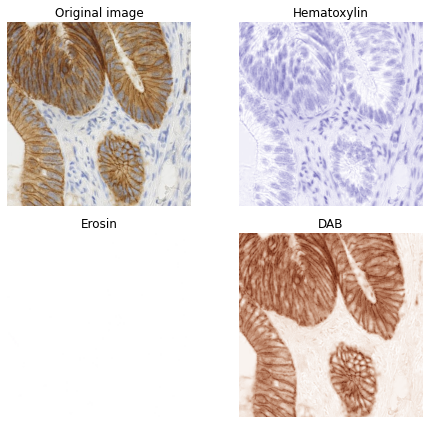

In [24]:
# Display
fig, axes = plt.subplots(2, 2, figsize=(7,6), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Erosin")

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis("off")
    
fig.tight_layout()


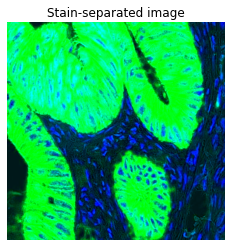

In [25]:
from skimage.exposure import rescale_intensity
# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0,1), in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))

d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0,1), in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))

# Cast the two channels into an RGB image, as the blue and green channels respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1,1,1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title("Stain-separated image")
axis.axis("off")
plt.show()
